In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


# Gene-level analyses

In [2]:
vegas <- inner_join(read_tsv('scored_genes.vegas.txt'), read_tsv('scored_genes.vegas.full.txt'), 
                    by = c('Chr','Gene','Start','Stop'), suffix = c('_pruned', '_full'))

Parsed with column specification:
cols(
  Chr = col_double(),
  Gene = col_character(),
  nSNPs = col_double(),
  nSims = col_double(),
  Start = col_double(),
  Stop = col_double(),
  Test = col_double(),
  Pvalue = col_double(),
  `Top-0.1-pvalue` = col_double(),
  `Best-SNP` = col_character(),
  `SNP-pvalue` = col_double()
)
Parsed with column specification:
cols(
  Chr = col_double(),
  Gene = col_character(),
  nSNPs = col_double(),
  nSims = col_double(),
  Start = col_double(),
  Stop = col_double(),
  Test = col_double(),
  Pvalue = col_double(),
  `Top-0.1-pvalue` = col_double(),
  `Best-SNP` = col_character(),
  `SNP-pvalue` = col_double()
)


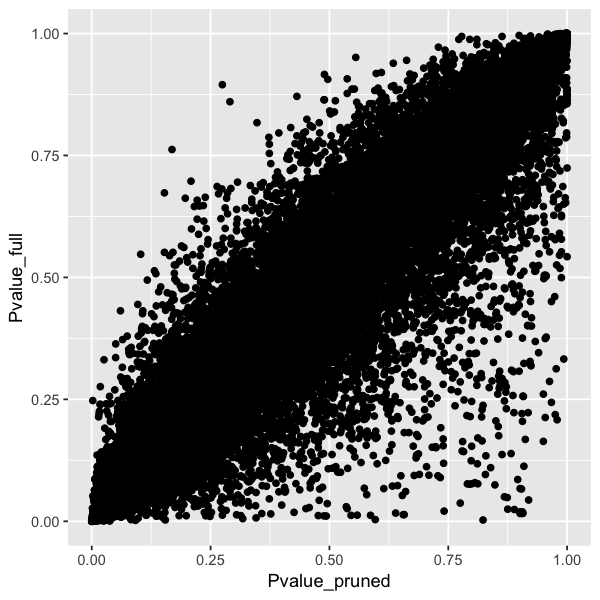

In [3]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(vegas, aes(Pvalue_pruned, Pvalue_full)) +
    geom_point()

Conclusion: we should not LD prune our data for VEGAS-score computation.

# SNP-level analyses

In [4]:
snps <- inner_join(read_tsv('univariate_models.covars.tsv') %>% filter(TEST == 'ADD'), 
                   read_tsv('univariate_models.no_covars.tsv'),
                   by = c('CHR', 'SNP', 'BP', 'A1'), suffix = c('_covars', '_no_covars')) %>%
    arrange(P_covars) %>%
    mutate(., q_covars = seq(1, nrow(.))/nrow(.)) %>%
    arrange(P_no_covars) %>%
    mutate(., q_no_covars = seq(1, nrow(.))/nrow(.))

Parsed with column specification:
cols(
  CHR = col_double(),
  SNP = col_character(),
  BP = col_double(),
  A1 = col_double(),
  TEST = col_character(),
  NMISS = col_double(),
  OR = col_double(),
  STAT = col_double(),
  P = col_double()
)
Parsed with column specification:
cols(
  CHR = col_double(),
  SNP = col_character(),
  BP = col_double(),
  A1 = col_double(),
  F_A = col_double(),
  F_U = col_double(),
  A2 = col_double(),
  CHISQ = col_double(),
  P = col_double(),
  OR = col_double()
)


Warning message:
“Removed 27 rows containing missing values (geom_point).”

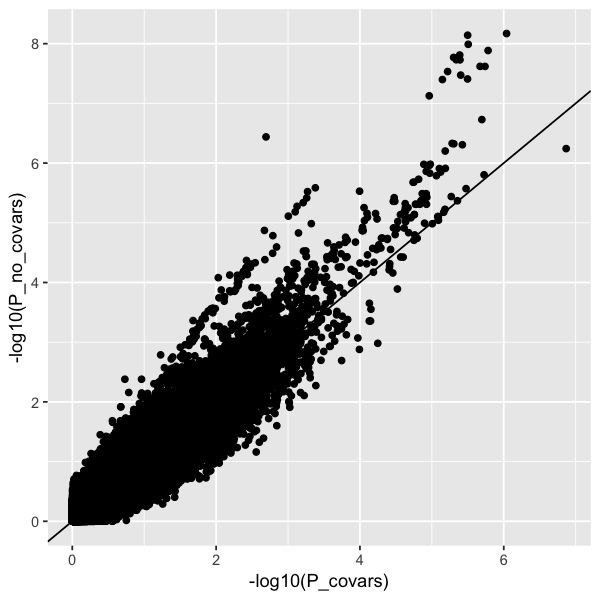

In [5]:
ggplot(snps, aes(-log10(P_covars), -log10(P_no_covars))) +
    geom_point() +
    geom_abline(slope = 1)

In [6]:
summary(snps$P_covars)
summary(snps$P_no_covars)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.2416  0.4946  0.4951  0.7482  1.0000      27 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2339  0.4872  0.4895  0.7435  1.0000 

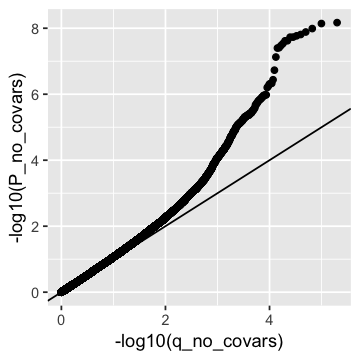

In [7]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(snps, aes(-log10(q_no_covars), -log10(P_no_covars))) +
    geom_point() + 
    geom_abline(slope = 1)

In [8]:
sum(snps$P_no_covars < (0.05/nrow(snps)))

[1] 16

Warning message:
“Removed 27 rows containing missing values (geom_point).”

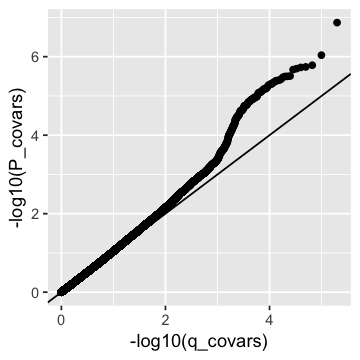

In [9]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(snps, aes(-log10(q_covars), -log10(P_covars))) +
    geom_point()+
    geom_abline(slope = 1)

In [10]:
sum(snps$P_covars < (0.05/nrow(snps)), na.rm = T)

[1] 1

Conclusion: we should not adjust by age.